imame podatoci, koi sto ne se labelirani, ke bidat klasificirani vo 1 klaster, odredeni podatoci vo drug klaster. Ni pravi kategorizacija klasteriranjeto

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# K-Means Clustering

In [2]:
x = np.zeros((150,2)) #150 redici, 2 koloni

In [3]:
x

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [4]:
np.random.seed(seed=42) #po kolku da mi gi presmetuva na random

In [5]:
x[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50) #do 50 , dodava 50 vrednosti  na nultata kolona 

# The code assigns random values to the first 50 elements of the first column of the array x. These values are drawn from a normal distribution with a mean (loc) of 0.0 and a standard deviation (scale) of 0.3.

In [6]:
x[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)  #vo vtorata kolona popolni gi prvite 50 vrednosti so random

In [7]:
# This helps in creating a distinct cluster of data points around the mean value of 2.0 in the first column.
x[50:100, 0] = np.random.normal(loc=2.0, scale=0.2, size=50)  #vrednosite tuka ke bidat centrirani okolu 2.
x[50:100, 1] = np.random.normal(loc=0.0, scale=0.5, size=50) 
#od 50 do 100te elementi gi popolnuvame vo dvete koloni

In [8]:
x[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50) 
x[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50) 

In [27]:
x

array([[ 1.49014246e-01,  9.72251908e-02],
       [-4.14792904e-02, -1.15524684e-01],
       [ 1.94306561e-01, -2.03076600e-01],
       [ 4.56908957e-01,  1.83502887e-01],
       [-7.02460124e-02,  3.09299857e-01],
       [-7.02410871e-02,  2.79384036e-01],
       [ 4.73763845e-01, -2.51765257e-01],
       [ 2.30230419e-01, -9.27637128e-02],
       [-1.40842316e-01,  9.93790294e-02],
       [ 1.62768013e-01,  2.92663538e-01],
       [-1.39025308e-01, -1.43752271e-01],
       [-1.39718926e-01, -5.56976930e-02],
       [ 7.25886815e-02, -3.31900492e-01],
       [-5.73984073e-01, -3.58861987e-01],
       [-5.17475350e-01,  2.43757747e-01],
       [-1.68686259e-01,  4.06872009e-01],
       [-3.03849336e-01, -2.16030365e-02],
       [ 9.42741998e-02,  3.01059869e-01],
       [-2.72407223e-01,  1.08490808e-01],
       [-4.23691110e-01, -1.93535926e-01],
       [ 4.39694631e-01,  1.08418682e-01],
       [-6.77328901e-02,  4.61410970e-01],
       [ 2.02584614e-02, -1.07478117e-02],
       [-4.

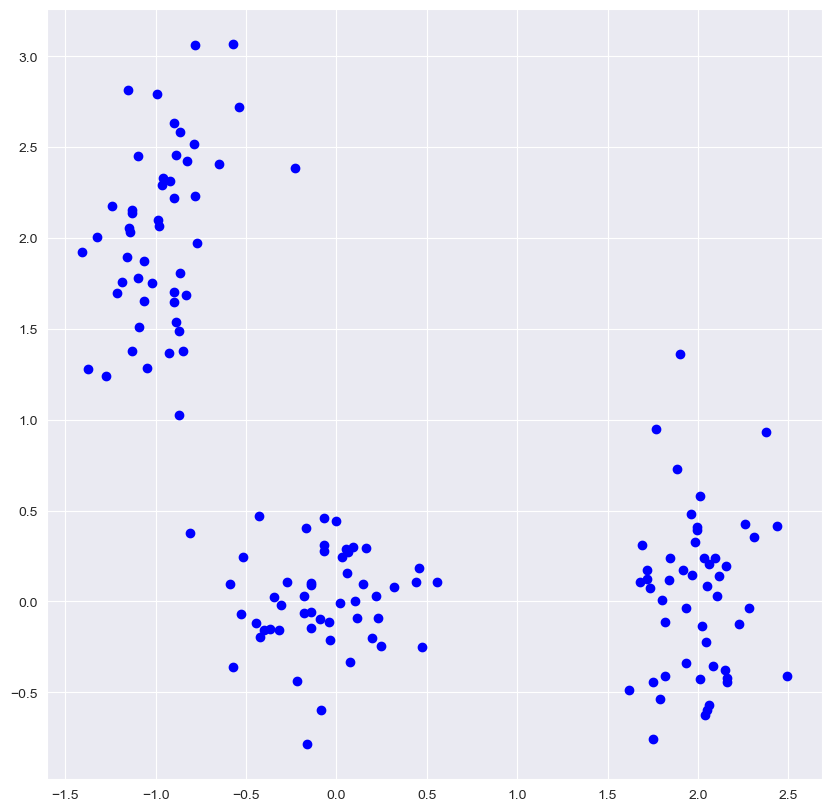

In [9]:
plt.figure(figsize=(10,10))
plt.plot(x[:, 0], x[:, 1], 'bo')

# plt.plot(x[:, 0], x[:, 1], 'bo'): This line plots the data points from the array x. The x[:, 0] selects all rows of the first column (x-coordinates), and x[:, 1] selects all rows of the second column (y-coordinates). The 'bo' argument specifies that the points should be plotted as blue circles.

1. centroidite gi naogame - tockite koi se centar 

In [10]:
centroid = np.random.normal(loc=0.0, scale=1, size=6) 
# size = 6 , zosto imame x i y koordinati (2 koordinati) za 3 centroidi - 2*3=6 

In [11]:
centroid = centroid.reshape((3,2)) #3 tocki ke imam so 2 koord

In [15]:
# za sekoja od tockite 

centroid_history = []

for i in range(4): # pominuva niz 3 klasteri
    
    # Calculate the distances from the points to the centroid.
    # kalkulira distancata pomegu sekoja tocka vo x i centroidot
    distances = cdist(x,centroid) # od sekoja tocka rastojanite do sekoj centroid, distanca na centroidite
    
    # Find the closest centroid to each point. 
    # za sekoja tocka, najdi go indeksot na najbliskiot centroid 
    labels = distances.argmin(axis=1) #indeks na centroidite koj e najblisku
    
    # Recompute the centroids.
    centroid[0,:] = np.mean(x[labels == 0, :], axis=0) #gi selektira site tocki blisku do prviot centroid
    centroid[1,:] = np.mean(x[labels == 1, :], axis=0) #gi selektira site tocki blisku do vtoriot centroid
    centroid[2,:] = np.mean(x[labels == 2, :], axis=0) #gi selektira site tocki blisku do tretiot centroid 
    
    #The np.mean function calculates the mean of these points along the specified axis (axis=0, which means it calculates the mean for each coordinate).
    
    centroid_history.append(centroid)
    

In [13]:
centroid_history

[array([[-0.08218251,  0.01266822],
        [ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965]]),
 array([[-0.08218251,  0.01266822],
        [ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965]]),
 array([[-0.08218251,  0.01266822],
        [ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965]])]

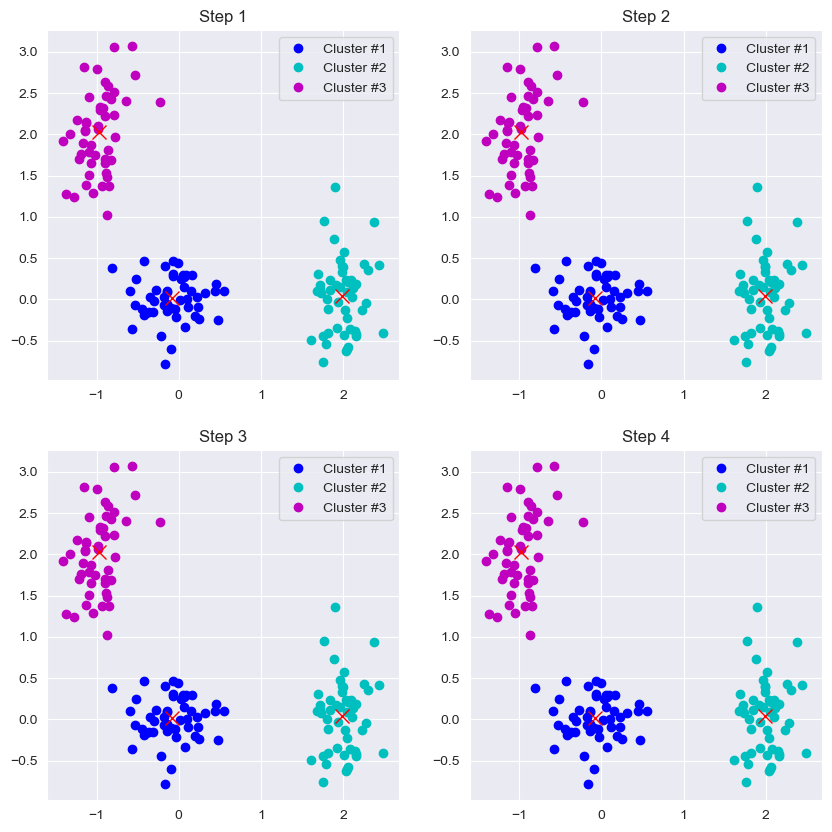

In [17]:
plt.figure(figsize=(10,10))

for i in range(4):
    distances = cdist(x, centroid_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(x[labels == 0, 0], x[labels == 0, 1], "bo", label="Cluster #1")
    plt.plot(x[labels == 1, 0], x[labels == 1, 1], "co", label="Cluster #2")
    plt.plot(x[labels == 2, 0], x[labels == 2, 1], "mo", label="Cluster #3")
    plt.plot(centroid_history[i][:, 0], centroid_history[i][:, 1], "rx", ms=10)
    plt.legend(loc=0)
    plt.title(f"Step {i + 1}");
    
    # For each iteration, the cdist function calculates the distance between each point in x and the centroids stored in centroid_history[i]. The argmin function finds the index of the closest centroid for each point.

In [21]:
from sklearn.cluster import KMeans

#tocka koja sto ke ni oznacuva kolku klasterite ni se dobri i kolku treba da ni bide k otprilika
inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    
    inertia.append(np.sqrt(kmeans.inertia_))


Text(0, 0.5, '$WSS$')

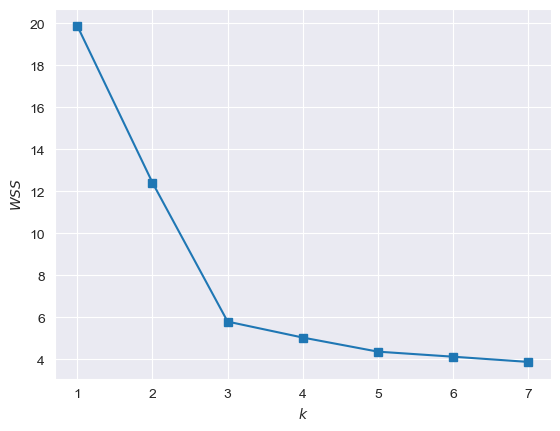

In [23]:
plt.plot(range(1,8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$WSS$")

# Hierachical Clustering


In [25]:
x = np.empty((150,2)) #2 koloni
y = np.empty((150,))

In [26]:
#2 koloni
x[:50, 0] = np.random.normal(loc=0.0, scale=0.3 , size=50)
x[:50, 1] = np.random.normal(loc=0.0, scale=0.3 , size=50)

In [29]:
y[:50] = np.full(fill_value=0, shape=50)

In [30]:
x[50:100, 0] = np.random.normal(loc=3.0, scale=0.5 , size=50)
x[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2 , size=50)

In [31]:
y[50:100] = np.full(fill_value=1, shape=50)

In [32]:
x[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2 , size=50)
x[100:150, 1] = np.random.normal(loc=2.0, scale=0.9 , size=50)

In [33]:
y[100:150] = np.full(fill_value=2, shape=50)

In [38]:
# Filling the array y with values 0, 1, and 2 is done to create labels for the data points, indicating which cluster each point belongs to. This is useful for supervised learning tasks or for evaluating the performance of clustering algorithms. In this case, the labels 0, 1, and 2 correspond to three different clusters.

In [34]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

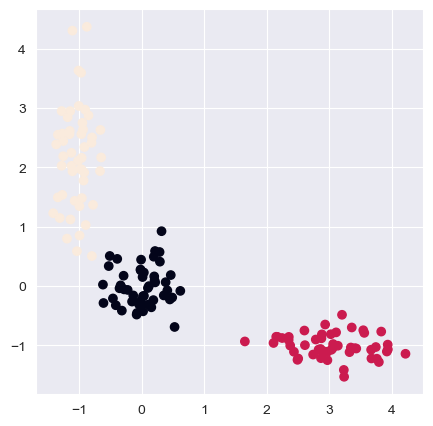

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

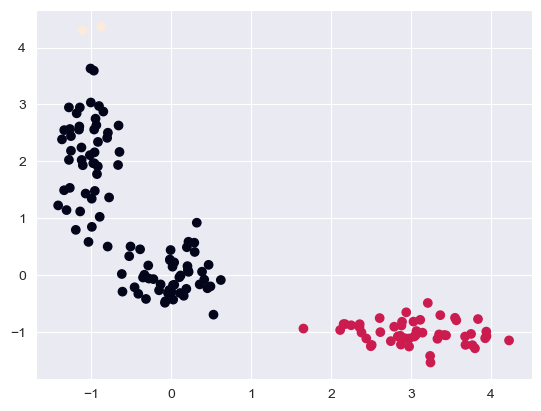

In [39]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="single")

clustering.fit(x)

plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)

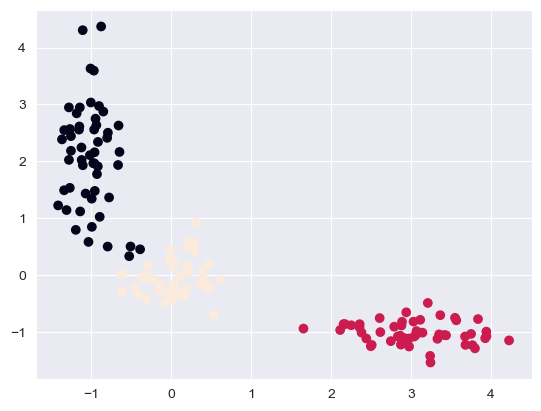

In [40]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="average")

clustering.fit(x)

plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)

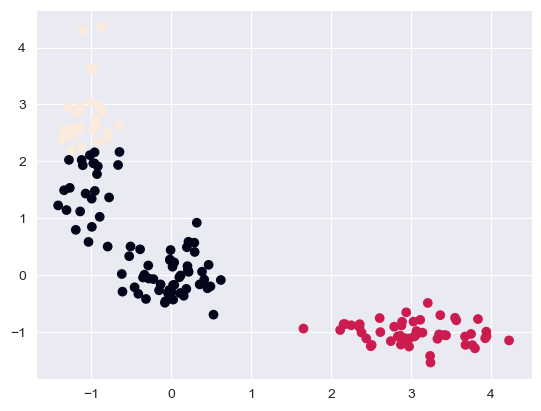

In [41]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="complete")

clustering.fit(x)

plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)

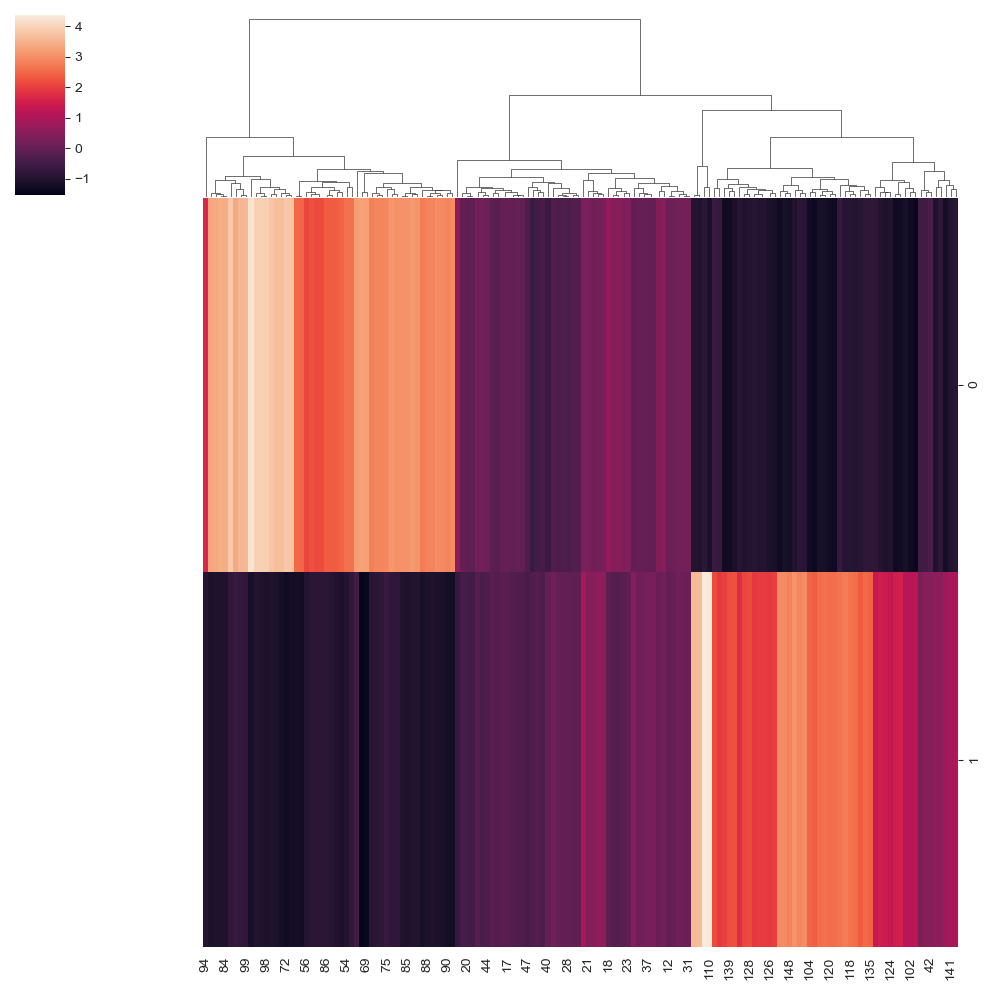

In [43]:
sns.clustermap(x.T, method="average", metric="euclidean", row_cluster=False)